In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(576, 8)
(576, 1)


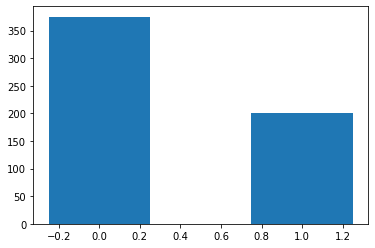

In [9]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

print(dfx.shape)
print(dfy.shape)

plotting_bar = np.unique(dfy,return_counts=True)
plt.bar(x = plotting_bar[0],height = plotting_bar[1],width=0.5)
plt.show()

In [10]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [11]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [12]:
datax = dfx.values
datay = dfy.values

print(type(datax))
print(datax.shape)
print(datay.shape)

<class 'numpy.ndarray'>
(576, 8)
(576, 1)


In [13]:
x_train = datax[1:,:]
y_train = datay[1:,:]

print(x_train.shape)
print(y_train.shape)

(575, 8)
(575, 1)


In [26]:
dft = pd.read_csv('Diabetes_Xtest.csv')
datat = dft.values
x_test = datat[1:,:]
x_test.shape

(191, 8)

In [41]:
def dist(a,b):
    return np.sqrt(sum((a-b)**2))

def knn(x,y,q,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = dist(q,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [42]:
x_train

array([[  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       [  2.   , 100.   ,  66.   , ...,  32.9  ,   0.867,  28.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [45]:
y = int(knn(x_train,y_train,x_train[0]))
print(y)

0


In [48]:
data_row = []
l = x_test.shape[0]
for i in range(l):
    y = int(knn(x_train,y_train,x_test[i]))
    data_row.append(y)

In [51]:
len(data_row)

191

In [57]:
with open('y_test.csv','w',encoding='utf') as f:
    header = "Outcome"
    header += "\n"
    f.write(header)
    for i in range(len(data_row)):
        outcome = str(data_row[i])
        outcome += "\n"
        f.write(outcome)
    f.close()

In [58]:
df = pd.read_csv('y_test.csv')
df.shape

(191, 1)